In [1]:
using DifferentialEquations, Plots, LinearAlgebra

# Premilinaries

In [2]:
# Number of dimesions (2 or 3)
const dim = 2;

# Gravitational constant in SI
const G₀ = 6.674 * 1e-11 # in m^3 / kg / t^2

# Natural units for Solar Celestical Mechanics
const Mₑ = 5.97 * 1e24 # mass of the Earth in kg
const Mₛ = 1.99 * 1e30 # mass of the Sun in kg
const AU = 1.49 * 1e11 # astronomical unit in m
const yr = 3.15 * 1e7  # year in seconds

const G = G₀ * Mₛ * yr^2 / AU^3

39.838371858211836

$\ddot{\vec{r}}_i = -G\sum_{j\neq i} \frac{m_j}{|\vec{r}_i-\vec{r}_j|^2}\frac{\vec{r}_i-\vec{r}_j}{|\vec{r}_i-\vec{r}_j|}$

In [3]:
# Acceleration as a function of position and mass
function acceleration(rᵢ,rⱼ,mⱼ)
    Δr = rᵢ-rⱼ
    return -G * mⱼ * Δr / norm(Δr)^3
end

acceleration (generic function with 1 method)

In [4]:
r₁ = [1, 0]
r₂ = [0, 1]

a₁ = acceleration(r₁,r₂,1)

2-element Vector{Float64}:
 -14.084991446186452
  14.084991446186452

# Software for solving the dynamics

We will use Julia's DifferentialEquations.jl.

- First-order ordinary differential equations (ODE) can be solved with the `ODEProblem` object;
- Second-order ODEs can be solved by converting them to larger first-order ODEs or with `SecondOrderODEProblem`.

See [documentation](https://diffeq.sciml.ai/stable/types/dynamical_types/) or [tutorials](https://tutorials.sciml.ai/html/models/01-classical_physics.html).

# Motion of a Planet around a Sun

In [5]:
const r☼ = [0.0,0.0]

function a(v,r,p,t)
    return acceleration(r, r☼, 1.0)
end

a (generic function with 1 method)

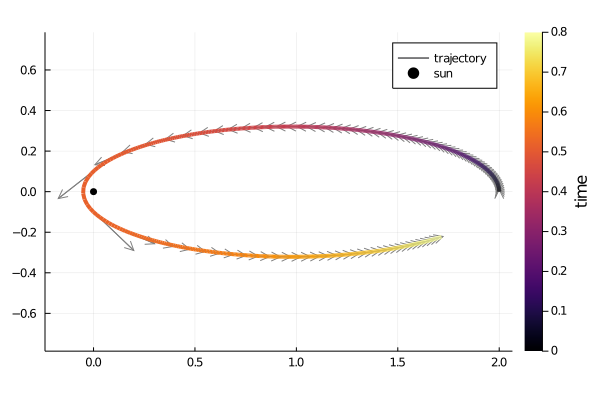

In [16]:
r₀ = [2.0, 0.0]
v₀ = [0.0, 1.0]
tspan = (0.0, 0.8)

planetsun_problem = SecondOrderODEProblem(a, v₀, r₀, tspan)
planetsun_solution = solve(planetsun_problem);

ts = range(tspan[1], tspan[end], length=1000)
x = [planetsun_solution(t)[3] for t in ts]
y = [planetsun_solution(t)[4] for t in ts]
vx = [planetsun_solution(t)[1] for t in ts]
vy = [planetsun_solution(t)[2] for t in ts];

plot()

quiver!(x[1:10:end],y[1:10:end],quiver=(vx[1:10:end]/100,vy[1:10:end]/100),
    color=:grey, label="velocity")

plot!(x,y,line_z=ts,
    linewidth=4, label="trajectory")
plot!(colorbar_title="time")

plot!([r☼[1]],[r☼[2]],
    line=nothing, marker=:circle, color=:black, label="sun")

plot!(aspectratio=:equal)

┌ Info: Saved animation to 
│   fn = /home/stefan/Documents/ScratchSpace/simple_celestical_mech_julia/tmp.gif
└ @ Plots /home/stefan/.julia/packages/Plots/SjqWU/src/animation.jl:104


Plots.AnimatedGif("/home/stefan/Documents/ScratchSpace/simple_celestical_mech_julia/tmp.gif")
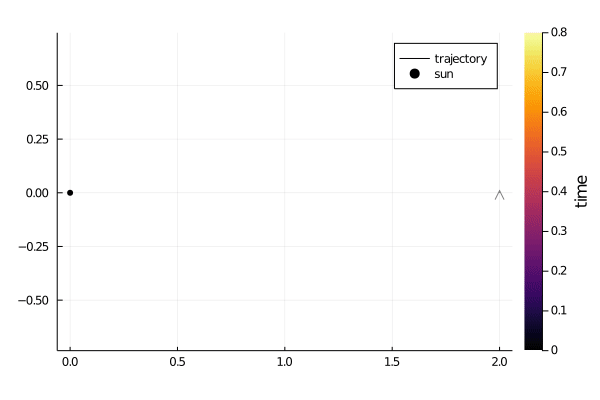

In [17]:
@gif for i in 1:10:length(ts)
    plot()

    quiver!([x[i]],[y[i]],quiver=([vx[i]]/100,[vy[i]]/100),
        color=:grey, label="velocity")

    plot!(x[1:i],y[1:i],line_z=ts[1:i],clim=extrema(ts),
        linewidth=4, label="trajectory")
    plot!(colorbar_title="time")

    plot!([r☼[1]],[r☼[2]],
        line=nothing, marker=:circle, color=:black, label="sun")

    plot!(aspectratio=:equal)
end